In [8]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# input
symbol = "SUM"
start_time = '2020-01-01'
end_time = '2020-07-29'

In [3]:
df = web.DataReader(symbol, 'yahoo', start_time, end_time)

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-23,17.150000,16.639999,17.15,17.070000,595700,17.070000
2020-06-24,16.690001,15.524000,16.51,15.580000,757600,15.580000
2020-06-25,16.129999,15.220000,15.40,16.110001,571300,16.110001
2020-06-26,15.970000,15.110000,15.97,15.310000,2137600,15.310000
2020-06-29,16.520000,15.400000,15.80,16.480000,706839,16.480000


In [4]:
df['MF Multiplier'] = (2*df['Adj Close'] - df['Low'] - df['High'])/(df['High']-df['Low'])
df['MF Volume'] = df['MF Multiplier']*df['Volume']
df['ADL'] = df['MF Volume'].cumsum()
df = df.drop(['MF Multiplier','MF Volume'],axis=1)

In [5]:
df['VolumePositive'] = df['Open'] < df['Adj Close']

Text(0.5,0,'Date')

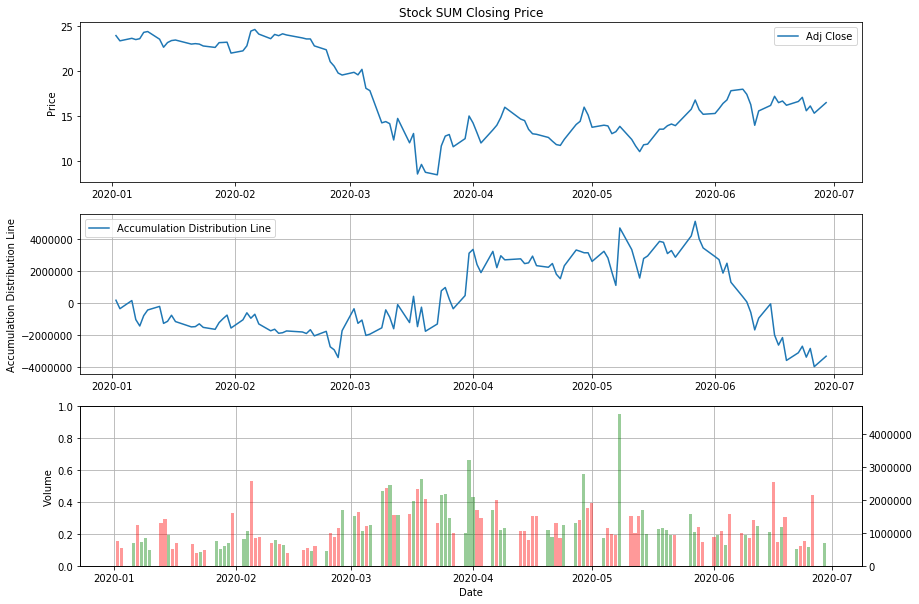

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['ADL'], label='Accumulation Distribution Line')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Accumulation Distribution Line')

ax3 = plt.subplot(3, 1, 3)
ax3v = ax3.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax3v.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.grid()
ax3.set_xlabel('Date')